# Trabajo Practico Nro 3: Filtros

### Ejercicio 1

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

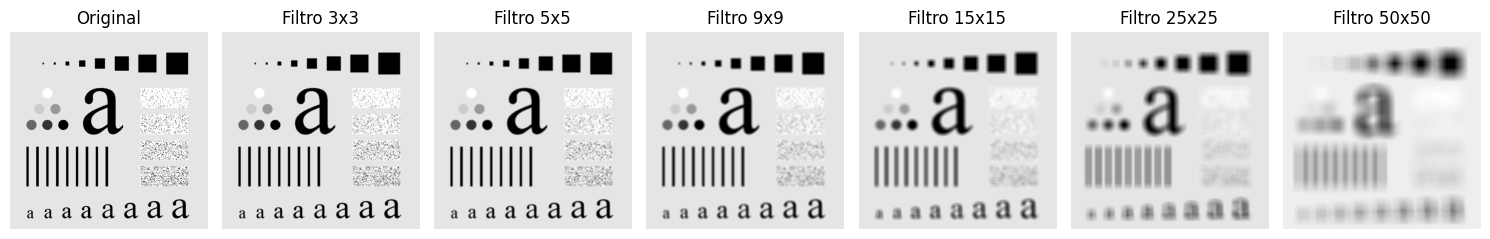

In [2]:
img = cv2.imread("imgs/characters_test_pattern.tif", cv2.IMREAD_GRAYSCALE)

# Tamaños de máscaras
kernel_sizes = [3, 5, 9, 15, 25, 50]

filtered_images = [img]
for k in kernel_sizes:
    kernel = np.ones((k, k), np.float32) / (k * k)
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_images.append(filtered)

titles = ["Original"] + [f"Filtro {k}x{k}" for k in kernel_sizes]

plt.figure(figsize=(15, 4))
for i, (im, title) in enumerate(zip(filtered_images, titles)):
    plt.subplot(1, len(filtered_images), i+1)
    plt.imshow(im, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

### Ejercicio 2

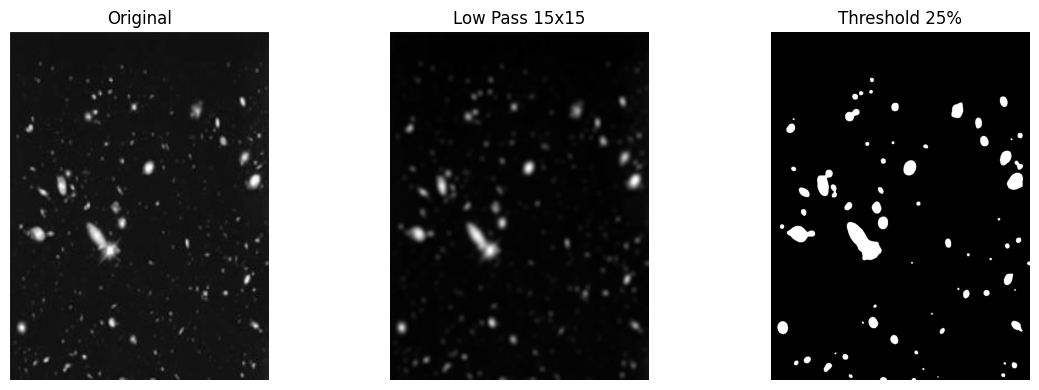

In [3]:
img = cv2.imread("imgs/stars.png", cv2.IMREAD_GRAYSCALE)

# Filtro pasa bajos 15x15
lowpass = cv2.blur(img, (15, 15))  # promedio

# Threshold de 25%
_, thresh = cv2.threshold(lowpass, int(0.25*255), 255, cv2.THRESH_BINARY)

titles = ["Original", "Low Pass 15x15", "Threshold 25%"]
images = [img, lowpass, thresh]

plt.figure(figsize=(12,4))
for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 3, i+1)
    plt.imshow(im, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()


### Ejercicio 3

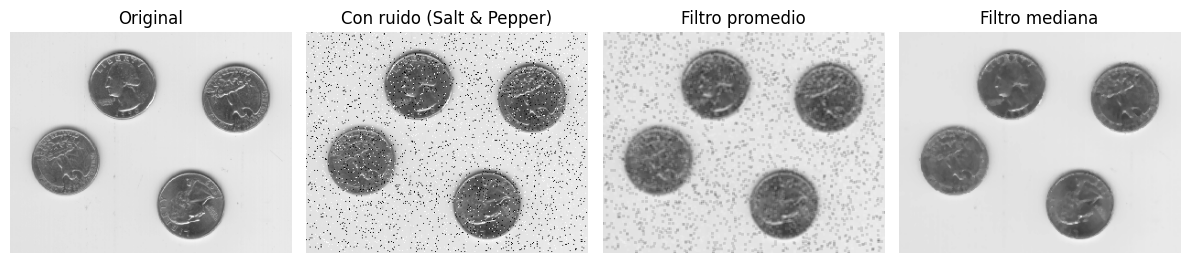

In [4]:
img = cv2.imread(cv2.samples.findFile('imgs/eight.tif'))

def salt_pepper_noise(image, prob):
    noisy = image.copy()
    num_salt = int(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255
    num_pepper = int(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0
    return noisy

noisy = salt_pepper_noise(img, 0.02)

# Filtro pasa bajos (promedio 3x3) 
kernel = np.ones((3,3), np.float32) / 9
lowpass = cv2.filter2D(noisy, -1, kernel)

# Filtro mediana
median = cv2.medianBlur(noisy, 3)

titles = ["Original", "Con ruido (Salt & Pepper)", "Filtro promedio", "Filtro mediana"]
images = [img, noisy, lowpass, median]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


### Ejercicio 4

Nota: La imagen que se usa en las diapositivas no estaba en el `.zip`

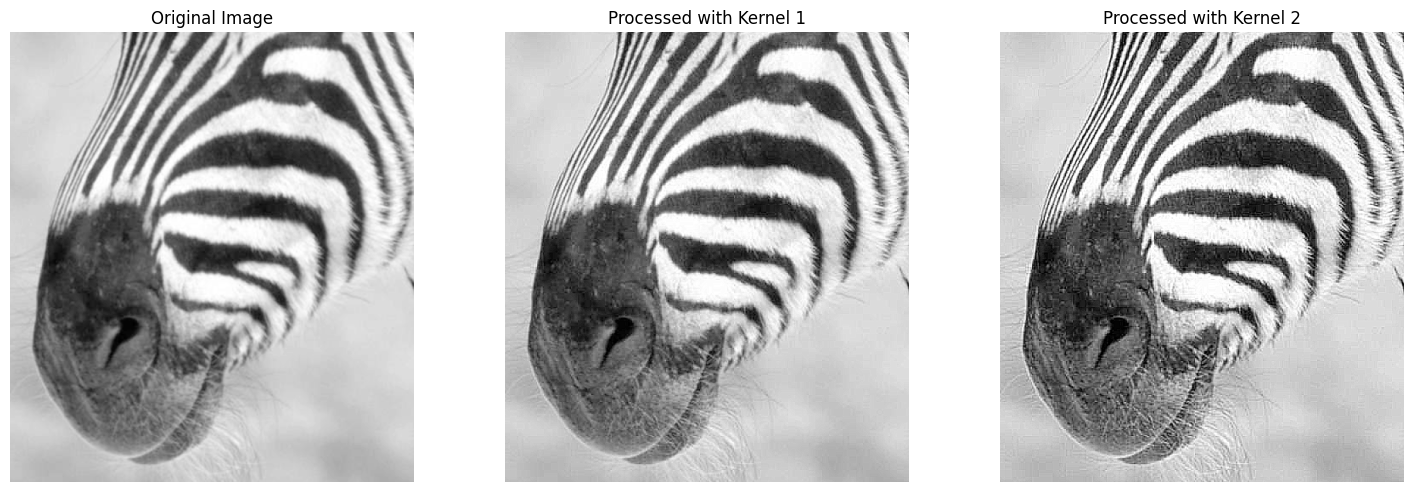

In [3]:
# Kernel para recuperar fondo sin perder informacion de los bordes
kernel_1 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)

# Kernel incluyendo diagonales
kernel_2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
], dtype=np.float32)

img = cv2.imread('imgs/zebra.png', cv2.IMREAD_GRAYSCALE)

# Kernel 1
processed_img_1 = cv2.filter2D(img, -1, kernel_1)

# Kernel 2
processed_img_2 = cv2.filter2D(img, -1, kernel_2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(processed_img_1, cmap='gray')
plt.title('Processed with Kernel 1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(processed_img_2, cmap='gray')
plt.title('Processed with Kernel 2')
plt.axis('off')

plt.tight_layout()
plt.show()


### Ejercicio 5

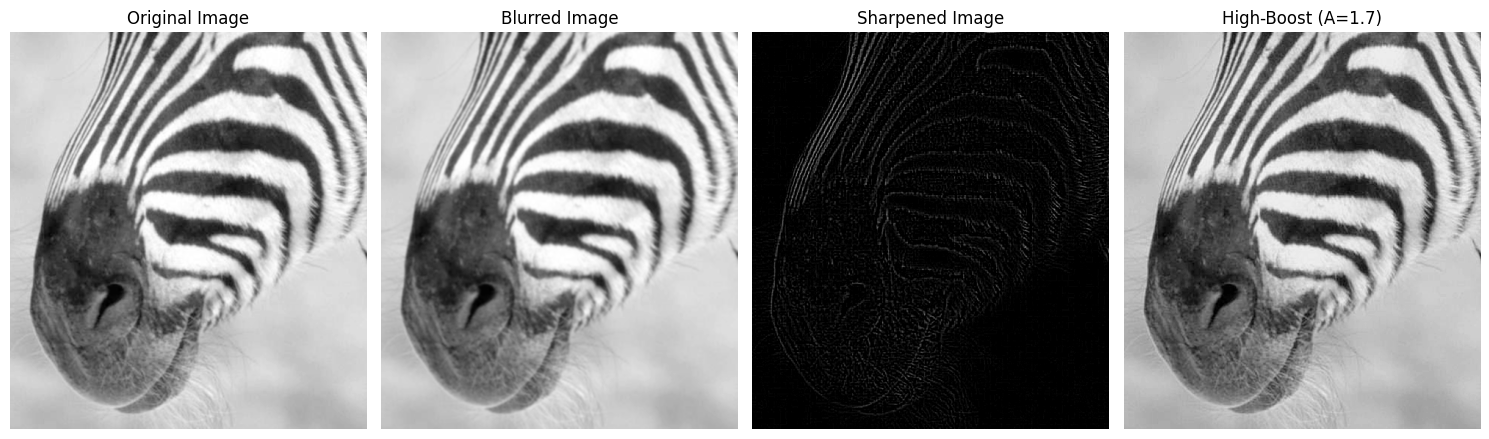

In [5]:
img = cv2.imread('imgs/zebra.png', cv2.IMREAD_GRAYSCALE)

# Blurred image
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Sharpened image
sharpened_img = cv2.subtract(img, blurred_img)

A = 1.7 
high_boost_img = np.float32(A) * np.float32(img) - np.float32(blurred_img)
high_boost_img = np.uint8(np.clip(high_boost_img, 0, 255))

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(high_boost_img, cmap='gray')
plt.title(f'High-Boost (A={A})')
plt.axis('off')

plt.tight_layout()
plt.show()

### Ejercicio 6

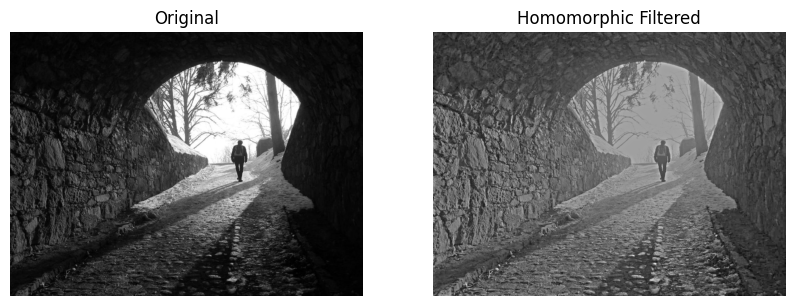

In [22]:
gamma_l = 0.25
gamma_h = 0.5
c = 1
d0 = 30

img = cv2.imread('imgs/tun.jpg', cv2.IMREAD_GRAYSCALE)
img_float = np.float64(img)
    
# Logarithmic transform
img_log = np.log1p(img_float)
    
# Fourier transform
dft = np.fft.fft2(img_log)
dft_shift = np.fft.fftshift(dft)
    
# Create Homomorphic filter
M, N = img.shape
U, V = np.meshgrid(np.arange(N), np.arange(M))
D_uv = np.sqrt((U - N/2)**2 + (V - M/2)**2)
H = (gamma_h - gamma_l) * (1 - np.exp(-c * (D_uv**2 / (d0**2)))) + gamma_l
    
# Apply filter
filtered_dft_shift = dft_shift * H
    
# Inverse Fourier transform
idft = np.fft.ifft2(np.fft.ifftshift(filtered_dft_shift))
img_exp = np.exp(np.real(idft)) - 1
    
# Normalize to 0–255
img_filtered = cv2.normalize(img_exp, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = np.uint8(img_filtered)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.imread('imgs/tun.jpg', cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Homomorphic Filtered")
plt.axis("off")
plt.show()


### Ejercicio 7

Multiplicar la imagen de entrada $i(x,y)$ por $(-1)^{x+y}$ es equivalente a desplazar a su DFT en frecuencia(como se vió en el TP2) ya que por la identidad de Eueler $-1 = e^{j\pi}$ se puede reescribir $(-1)^{x+y} = e^{j\pi(x+y)}$:
$$i_1(x,y) = i(x,y) \cdot e^{j\pi(x+y)}$$

Aplicando la DFT resulta:
$$I_1(u,v) = \mathrm{DFT}\{i_1(x,y)\}$$
cuyo conjugado se vuelve:
$$I_2(u,v) = I^*_1(u,v)$$
y la IDFT de este último:
$$i_2(x,y) = \mathrm{IDFT}\{I_2(u,v)\}$$

Para una función $f(x,y)$ cuya DFT es $F(u,v)$:
$$\mathrm{IDFT}\{F^*(u,v)\} = f^*(-x,-y)$$

Siendo en este caso $f(x,y) = i_1(x,y)$:
$$i_2(x,y) = i^*_1(-x,-y)$$

En el último paso la señal se multiplica nuevamente por $(-1)^{x+y}$:
$$i'(x,y) = i_2(x,y)\cdot (-1)^{x+y}$$
y reemplazando $i_2(x,y)$:
$$i'(x,y) = i^*_1(-x,-y)\cdot (-1)^{x+y}$$

Reescribiendo $i_1(-x,-y) = i(-x,-y) \cdot (-1)^{-x-y}$, y siendo $(-1)^{-x-y} = (-1)^{x+y}$, tomar el conjugado de $i_1(-x,-y)$ solo afectará a $i(-x,-y)$:
$$i'(x,y) = [i^*(-x,-y)\cdot (-1)^{x+y}]\cdot (-1)^{x+y}$$
$$i'(x,y) = i^*(-x,-y)\cdot [(-1)^{x+y}]^2$$
donde el término $[(-1)^{x+y}]^2=1$ quedando:
$$i'(x,y) = i^*(-x,-y)$$
es decir, la imagen de salida es la imagen de entrada invertida espacialmente y conjugada en el dominio complejo.

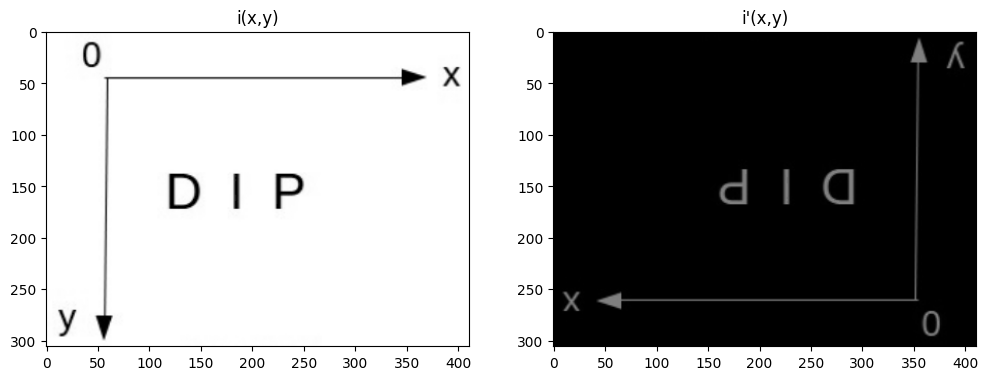

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def transform_image(img):
    """
    Aplica el flujo:
        i(x,y) -> multiplicar por (-1)^(x+y) -> DFT -> conjugado -> IDFT -> multiplicar por (-1)^(x+y)
    """
    # Float complejo
    img = img.astype(np.complex64)

    # 1. Multiplicación inicial por (-1)^(x+y)
    rows, cols = img.shape
    x = np.arange(rows).reshape(-1, 1)
    y = np.arange(cols).reshape(1, -1)
    centering_mask = (-1) ** (x + y)
    i1 = img * centering_mask

    # 2. DFT
    I1 = np.fft.fft2(i1)

    # 3. Conjugado
    I2 = np.conj(I1)

    # 4. IDFT
    i2 = np.fft.ifft2(I2)

    # 5. Multiplicación final por (-1)^(x+y)
    i_prime = i2 * centering_mask

    return i_prime

img = cv2.imread("imgs/imagen 1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar la transformación
img_transformed = transform_image(img)

# Para imágenes reales, tomamos la parte real
img_transformed_real = np.real(img_transformed)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("i(x,y)")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.title("i'(x,y)")
plt.imshow(img_transformed_real, cmap="gray")
plt.show()


Se observa que cada punto de la imagen original se reflejó con respecto al origen $(x,y)\rightarrow(-x,-y)$, lo cual se condice con una rotación de 180º al rededor del centro de la imagen.

Los valores de pixel se ven invertidos ya que al tomar la parte real de la transformada (para poder visualizarla), estos quedan con valores invertidos respecto a la imagen original, producto de haber conjugado en el dominio complejo.

In [12]:
print("Imagen original", img)
print("Imagen transformada", img_transformed)
print("Parte real de imagen transformada", img_transformed_real)

Imagen original [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Imagen transformada [[ 255.+1.03285205e-13j -255.-1.31380833e-13j -255.+8.52813238e-14j ...
  -255.+9.78072533e-15j -255.-6.81593568e-15j -255.-1.30400107e-13j]
 [ 255.+1.88666376e-13j -255.-1.59990797e-13j -255.+2.13681003e-14j ...
  -255.-5.47737850e-14j -255.-7.52058894e-14j -255.-1.22247202e-13j]
 [ 255.+2.74684400e-13j -255.+6.19716765e-14j -255.+3.80912435e-14j ...
  -255.-5.45722843e-14j -255.-9.75204306e-14j -255.+2.50671377e-14j]
 ...
 [ 255.+2.65535143e-14j -255.+5.04399112e-14j -255.+1.30035777e-13j ...
  -255.-1.59510364e-13j -255.-1.69503701e-13j -255.-4.86755650e-14j]
 [ 255.+6.93496436e-14j -255.-6.79249459e-14j -255.+1.50584527e-13j ...
  -255.-5.42142725e-14j -255.+7.01337904e-15j -255.-6.08999660e-14j]
 [ 255.-1.09408031e-14j -255.-1.15661856e-13j -255.+1.66944499